In [1]:
import pandas as pd

In [2]:
youtube_channel_df = pd.read_csv('Most Subscribed YouTube Channels_exported.csv')

In [3]:
type(youtube_channel_df)

pandas.core.frame.DataFrame

In [4]:
pd.set_option('display.max_columns',7)

In [5]:
youtube_channel_df.head(5)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States


In [6]:
youtube_channel_df.head(5).transpose()

,0,1,2,3,4
Name,T-Series,MrBeast,Cocomelon,Sony Entertainment Television India,Kids Diana Show
Brand channel,Yes,No,Yes,Yes,Yes
Subscribers (millions),249.0,184.0,165.0,162.0,113.0
Primary language,Hindi[7][8],English,English,Hindi[9],English[10][11][12]
Category,Music,Entertainment,Education,Entertainment,Entertainment
Country,India,United States,United States,India,Ukraine- United States


In [7]:
youtube_channel_df[:-5]

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,T-Series,Yes,249.0,Hindi[7][8],Music,India
1,MrBeast,No,184.0,English,Entertainment,United States
2,Cocomelon,Yes,165.0,English,Education,United States
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States
5,PewDiePie,No,111.0,English,Entertainment,Sweden
6,Like Nastya,No,107.0,English,Entertainment,Russia- United States
7,Vlad and Niki,No,101.0,English,Entertainment,Russia- United States
8,Zee Music Company,Yes,99.5,Hindi[13][14],Music,India
9,WWE,Yes,97.1,English,Sports,United States


In [8]:
#Slicing And Indexing

In [9]:
youtube_channel_df['Primary language'][0:5]

0            Hindi[7][8]
1                English
2                English
3               Hindi[9]
4    English[10][11][12]
Name: Primary language, dtype: object

In [10]:
youtube_channel_df.iloc[4:9,1:4]

,Brand channel,Subscribers (millions),Primary language
4,Yes,113.0,English[10][11][12]
5,No,111.0,English
6,No,107.0,English
7,No,101.0,English
8,Yes,99.5,Hindi[13][14]


In [11]:
###Value Counts

In [12]:
youtube_channel_df.Category.value_counts()

Category
Music            22
Entertainment    17
Education         4
Sports            2
Film              2
How-to            1
News              1
Games             1
Name: count, dtype: int64

In [13]:
youtube_channel_df.Category.value_counts(normalize = True)*100

Category
Music            44.0
Entertainment    34.0
Education         8.0
Sports            4.0
Film              4.0
How-to            2.0
News              2.0
Games             2.0
Name: proportion, dtype: float64

In [14]:
###cross Tabulation

In [15]:
pd.crosstab(youtube_channel_df['Primary language'],youtube_channel_df['Category'])

Category,Education,Entertainment,Film,...,Music,News,Sports
Primary language,,,,,,,
Bhojpuri,0,0,0,...,1,0,0
English,2,5,1,...,8,0,2
English[10][11][12],0,1,0,...,0,0,0
Hindi,1,5,1,...,5,1,0
Hindi[13][14],0,0,0,...,1,0,0
Hindi[16],1,0,0,...,0,0,0
Hindi[7][8],0,0,0,...,1,0,0
Hindi[9],0,1,0,...,0,0,0
Korean,0,0,0,...,3,0,0


In [16]:
#Sorting the dataset

In [17]:
youtube_channel_df[['Name','Subscribers (millions)']].sort_values(by='Subscribers (millions)', ascending=False).head(5)

,Name,Subscribers (millions)
0,T-Series,249.0
1,MrBeast,184.0
2,Cocomelon,165.0
3,Sony Entertainment Television India,162.0
4,Kids Diana Show,113.0


In [18]:
##creating column

In [19]:
import numpy as np

youtube_channel_df['Monetization Potential'] = youtube_channel_df['Subscribers (millions)'] * np.where(
    youtube_channel_df['Brand channel'] == 'Yes', 1.5, 1
)

In [20]:
#data Aggregation

In [135]:
youtube_channel_df.groupby(['Category', 'Brand channel'])['Subscribers (millions)'].mean()


Category       Brand channel
Education      Yes              89.400000
Entertainment  No               99.800000
               Yes              73.018182
Film           Yes              74.650000
Games          No               46.300000
How-to         Yes              80.200000
Music          No               60.900000
               Yes              79.200000
News           Yes              58.800000
Sports         No               59.700000
               Yes              97.100000
Name: Subscribers (millions), dtype: float64

In [137]:
subscribers_by_category = youtube_channel_df.groupby(['Category','Brand channel'])['Subscribers (millions)'].mean().reset_index()

In [139]:
subscribers_by_category

,Category,Brand channel,Subscribers (millions)
0,Education,Yes,89.400000
1,Entertainment,No,99.800000
2,Entertainment,Yes,73.018182
3,Film,Yes,74.650000
4,Games,No,46.300000
5,How-to,Yes,80.200000
6,Music,No,60.900000
7,Music,Yes,79.200000
8,News,Yes,58.800000
9,Sports,No,59.700000


In [24]:
subscribers_by_category_language = youtube_channel_df.groupby(['Category','Primary language'])['Subscribers (millions)'].mean().reset_index()

In [25]:
subscribers_by_category_language

,Category,Primary language,Subscribers (millions)
0,Education,English,117.250000
1,Education,Hindi,55.600000
2,Education,Hindi[16],67.500000
3,Entertainment,English,111.200000
4,Entertainment,English[10][11][12],113.000000
5,Entertainment,Hindi,66.760000
6,Entertainment,Hindi[9],162.000000
7,Entertainment,Russian,47.650000
8,Entertainment,Spanish,47.800000
9,Entertainment,Urdu,46.300000


In [26]:
subscribers_by_category_language_country = youtube_channel_df.groupby(['Category','Primary language','Country'])['Subscribers (millions)'].mean().reset_index()

In [27]:
subscribers_by_category_language_country

,Category,Primary language,Country,Subscribers (millions)
0,Education,English,South Korea,69.500000
1,Education,English,United States,165.000000
2,Education,Hindi,India,55.600000
3,Education,Hindi[16],India,67.500000
4,Entertainment,English,Russia- United States,104.000000
5,Entertainment,English,Sweden,111.000000
6,Entertainment,English,United States,118.500000
7,Entertainment,English[10][11][12],Ukraine- United States,113.000000
8,Entertainment,Hindi,India,66.760000
9,Entertainment,Hindi[9],India,162.000000


In [28]:
#Joining the dataframes

In [29]:
subscribers_comparison = subscribers_by_category_language_country.merge (subscribers_by_category, on = 'Category', how = 'outer')

In [30]:
subscribers_comparison 

,Category,Primary language,Country,Subscribers (millions)_x,Subscribers (millions)_y
0,Education,English,South Korea,69.500000,89.400000
1,Education,English,United States,165.000000,89.400000
2,Education,Hindi,India,55.600000,89.400000
3,Education,Hindi[16],India,67.500000,89.400000
4,Entertainment,English,Russia- United States,104.000000,82.470588
5,Entertainment,English,Sweden,111.000000,82.470588
6,Entertainment,English,United States,118.500000,82.470588
7,Entertainment,English[10][11][12],Ukraine- United States,113.000000,82.470588
8,Entertainment,Hindi,India,66.760000,82.470588
9,Entertainment,Hindi[9],India,162.000000,82.470588


In [31]:
# renaming column name

In [32]:
subscribers_comparison.rename (columns = {'Subscribers (millions)_x':'Subscribers (millions)_category_language','Subscribers (millions)_y':'Subscribers (millions)_category'}, inplace = True)
subscribers_comparison.head(5)

,Category,Primary language,Country,Subscribers (millions)_category_language,Subscribers (millions)_category
0,Education,English,South Korea,69.5,89.400000
1,Education,English,United States,165.0,89.400000
2,Education,Hindi,India,55.6,89.400000
3,Education,Hindi[16],India,67.5,89.400000
4,Entertainment,English,Russia- United States,104.0,82.470588


In [33]:
#Filtering Based on Multiple Conditions Across Different Columns

In [34]:
youtube_channel_df[(youtube_channel_df['Subscribers (millions)'] > 100) & 
                   (youtube_channel_df['Category'] == 'Music') & 
                   (youtube_channel_df['Country'] == 'India')]

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country,Monetization Potential
0,T-Series,Yes,249.0,Hindi[7][8],Music,India,373.5


In [35]:
#Using Lambda Functions for Custom Filters

In [36]:
youtube_channel_df[youtube_channel_df['Subscribers (millions)'].apply(lambda x: x > 70 and x < 150)]

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country,Monetization Potential
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States,169.50
5,PewDiePie,No,111.0,English,Entertainment,Sweden,111.00
6,Like Nastya,No,107.0,English,Entertainment,Russia- United States,107.00
7,Vlad and Niki,No,101.0,English,Entertainment,Russia- United States,101.00
8,Zee Music Company,Yes,99.5,Hindi[13][14],Music,India,149.25
9,WWE,Yes,97.1,English,Sports,United States,145.65
10,Blackpink,No,91.2,Korean,Music,South Korea,91.20
11,Goldmines,Yes,89.5,Hindi,Film,India,134.25
12,Sony SAB,Yes,85.2,Hindi,Entertainment,India,127.80
13,5-Minute Crafts,Yes,80.2,English,How-to,Cyprus[a],120.30


In [37]:
#identifying channels with exceptional metrics

In [38]:
top_10_percent = youtube_channel_df['Subscribers (millions)'].quantile(0.9)
youtube_channel_df[youtube_channel_df['Subscribers (millions)'] > top_10_percent]

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country,Monetization Potential
0,T-Series,Yes,249.0,Hindi[7][8],Music,India,373.5
1,MrBeast,No,184.0,English,Entertainment,United States,184.0
2,Cocomelon,Yes,165.0,English,Education,United States,247.5
3,Sony Entertainment Television India,Yes,162.0,Hindi[9],Entertainment,India,243.0
4,Kids Diana Show,Yes,113.0,English[10][11][12],Entertainment,Ukraine- United States,169.5


In [39]:
#Filtering in single line

In [40]:
youtube_channel_df[youtube_channel_df['Subscribers (millions)'] > 50].query("Category == 'Music'").groupby('Country').sum().sort_values(by='Subscribers (millions)', ascending=False)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Monetization Potential
Country,,,,,,
India,T-SeriesZee Music CompanyShemaroo Entertainmen...,YesYesYesYesYesYesYes,649.4,Hindi[7][8]Hindi[13][14]HindiHindiBhojpuriHind...,MusicMusicMusicMusicMusicMusicMusic,974.10
South Korea,BlackpinkBangtanTVHybe Labels,NoNoYes,240.2,KoreanKoreanKorean,MusicMusicMusic,276.50
United States,EminemMarshmelloTaylor SwiftAriana Grande,NoNoNoNo,220.9,EnglishEnglishEnglishEnglish,MusicMusicMusicMusic,220.90
Canada,Justin Bieber,No,71.9,English,Music,71.90
Brazil,Canal KondZilla,Yes,66.6,Portuguese,Music,99.90
Argentina,El Reino Infantil,Yes,59.7,Spanish,Music,89.55
Romania,LooLoo Kids,Yes,54.7,English,Music,82.05
United Kingdom,Ed Sheeran,No,53.7,English,Music,53.70


In [84]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [129]:
subscribers_by_category

,Category,Subscribers (millions)
0,Education,89.400000
1,Entertainment,82.470588
2,Film,74.650000
3,Games,46.300000
4,How-to,80.200000
5,Music,70.881818
6,News,58.800000
7,Sports,78.400000


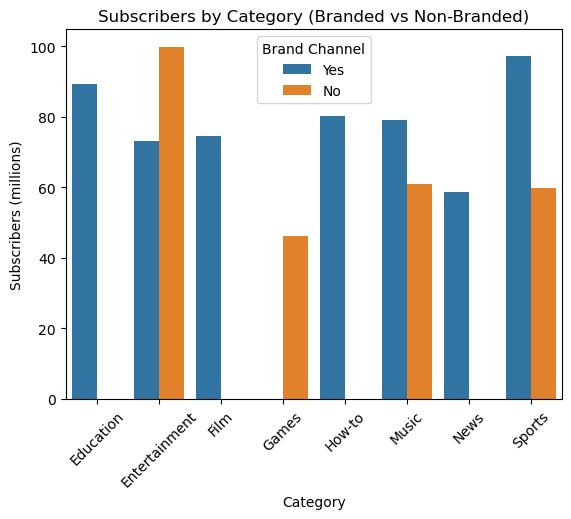

In [145]:
sn.barplot(x='Category', y='Subscribers (millions)',hue = 'Brand channel', data=subscribers_by_category)
plt.title("Subscribers by Category (Branded vs Non-Branded)")
plt.xlabel("Category")
plt.ylabel("Subscribers (millions)")
plt.legend(title="Brand Channel")
plt.xticks(rotation=45)
plt.show()


In [147]:
#Histogram

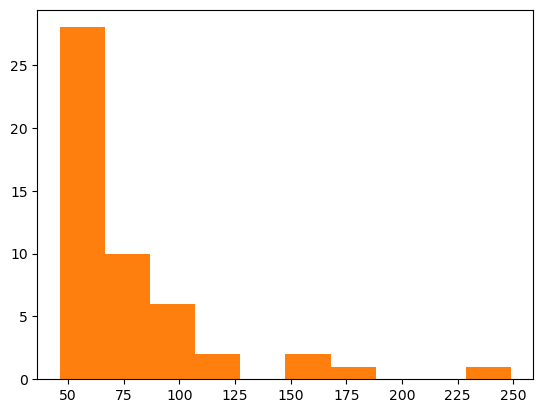

In [153]:
plt.hist(youtube_channel_df['Subscribers (millions)']);
plt.show();

In [184]:
#Distrubution plot
sn.distplot(youtube_channel_df['Subscribers (millions)']);

C:\Users\sange\AppData\Local\Temp\ipykernel_9408\1071404101.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(youtube_channel_df['Subscribers (millions)']);


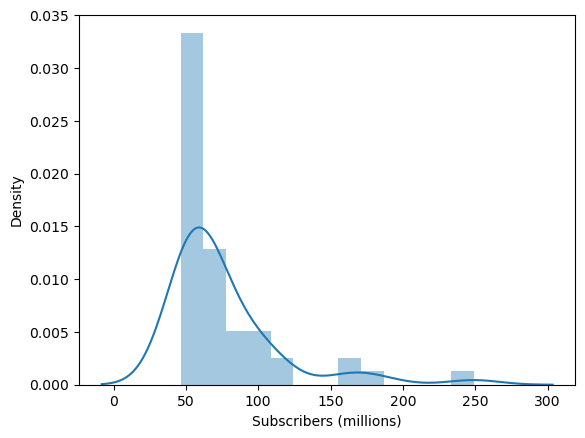

In [182]:
plt.show();

In [186]:
#Box Plot

In [192]:
Box = sn.boxplot(youtube_channel_df['Subscribers (millions)']);

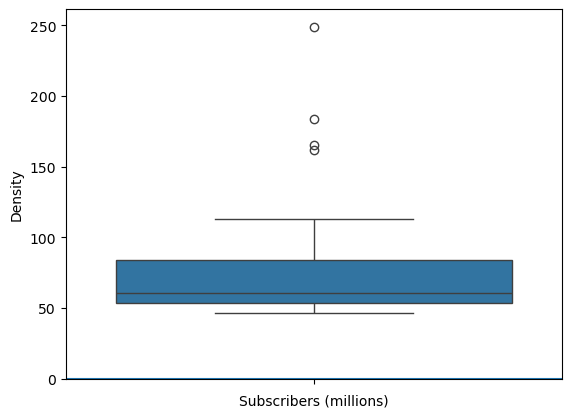

In [194]:
plt.show();

In [201]:
[item.get_ydata()[0] for item in Box ['caps']]

[46.3, 113.0]

In [205]:
[item.get_ydata()[0] for item in Box ['whiskers']]

[53.800000000000004, 83.95]

In [207]:
[item.get_ydata() [0] for item in Box ['medians']]

[60.3]

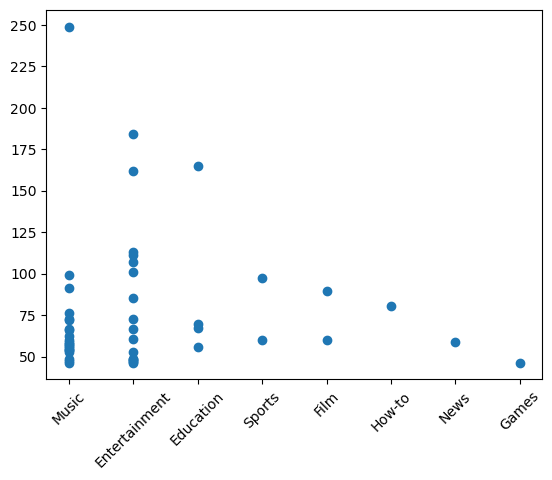

In [220]:
# Scatter plot
plt.scatter(x = youtube_channel_df.Category, y = youtube_channel_df['Subscribers (millions)']);
plt.xticks(rotation = 45);
plt.show();

In [244]:
# Convert 'Category' to numerical values
subscribers_by_category['Category_encoded'] = subscribers_by_category['Category'].astype('category').cat.codes
subscribers_by_category[['Category', 'Category_encoded']].head()


,Category,Category_encoded
0,Education,0
1,Entertainment,1
2,Entertainment,1
3,Film,2
4,Games,3


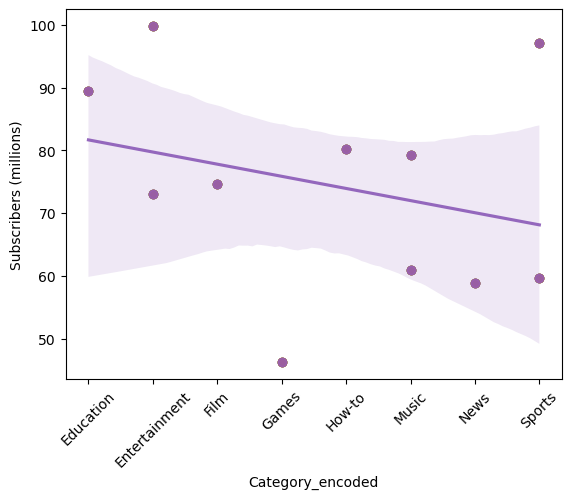

In [246]:
sn.regplot(x='Category_encoded', 
           y='Subscribers (millions)', 
           data = subscribers_by_category); 
plt.xticks(rotation = 45);
plt.show();

In [248]:
#pie chart

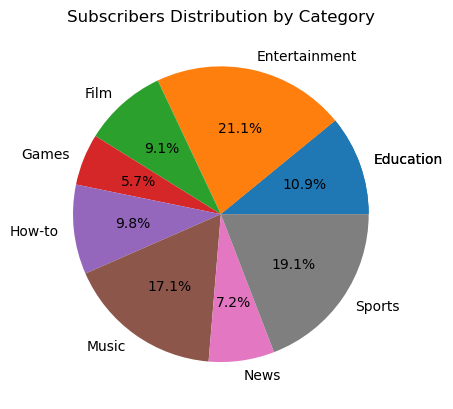

In [258]:
subscribers_by_category.groupby('Category')['Subscribers (millions)'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Subscribers Distribution by Category")
plt.ylabel("")  # Remove default label
plt.show()


In [262]:
#line plot

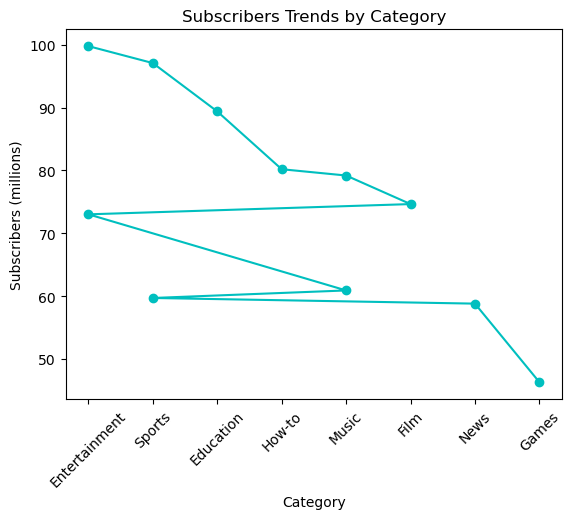

In [260]:
sorted_data = subscribers_by_category.sort_values('Subscribers (millions)', ascending=False)
plt.plot(sorted_data['Category'], sorted_data['Subscribers (millions)'], marker='o', color='c')
plt.title("Subscribers Trends by Category")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Subscribers (millions)")
plt.show()


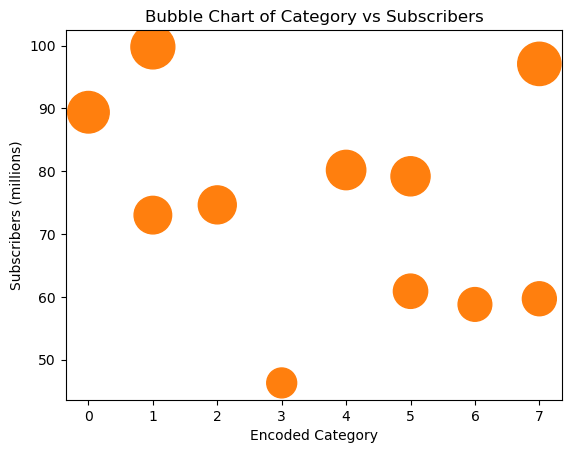

In [287]:
plt.scatter(x=subscribers_by_category['Category_encoded'], y=subscribers_by_category['Subscribers (millions)'],
            s=subscribers_by_category['Subscribers (millions)']*10, alpha=1)
plt.title("Bubble Chart of Category vs Subscribers")
plt.xlabel("Encoded Category")
plt.ylabel("Subscribers (millions)")
plt.show()


In [289]:
#heat map

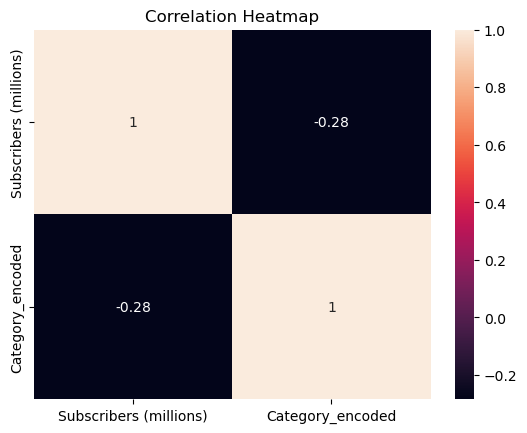

In [317]:
correlation_matrix = subscribers_by_category[['Subscribers (millions)', 'Category_encoded']].corr()
sn.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()
